<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-visionary-s/blob/main/ISEN_370_Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this assignment, you will use data science tools to exlore two datasets, calculate confidence intervals and conduct a hypothesis testing on the given datasets.
You can use ISEN 370 Project 2 Demo file as a reference when completing this assignment.


First, you will need to import required libraries to the project.

In [ ]:

import numpy as np

In [ ]:
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

import scipy.stats as stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site. We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below. There are two CSV files, the first contains data from 9/01/17-9/30/17 and the second contains data from 10/01/17-10/31/17.
The following codes provide the link to where the data are stored.

In [ ]:
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'


## Exploring Data

* Display the first 10 rows of data for each of the two data sets mentioned above.

In [ ]:
df1=pd.read_csv(data_url3)
df1.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


In [ ]:

dft2=pd.read_csv(data_url4)
dft2.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,10/1/2017 0:19,62.096,0.029084
1,10/1/2017 0:30,61.916,0.032962
2,10/1/2017 0:36,61.862,0.026500
3,10/1/2017 13:25,60.512,0.018774
4,10/1/2017 13:35,60.494,0.016194
5,10/1/2017 13:48,60.566,0.013135
6,10/1/2017 14:33,60.836,0.014517
7,10/1/2017 16:40,62.114,0.011127
8,10/1/2017 17:32,62.204,0.006843
9,10/1/2017 17:46,62.150,0.004584


## Exploring Data
Generate **two** scatter plots: one for the estimated flow rate data in September 2017 and the other for the estimated flow rate data in October 2017. Make sure to provide the title, x axis label and y axis label for your scatter plots.

## Scatter Plot 1

In [ ]:
df1=pd.read_csv(data_url3)
df1.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


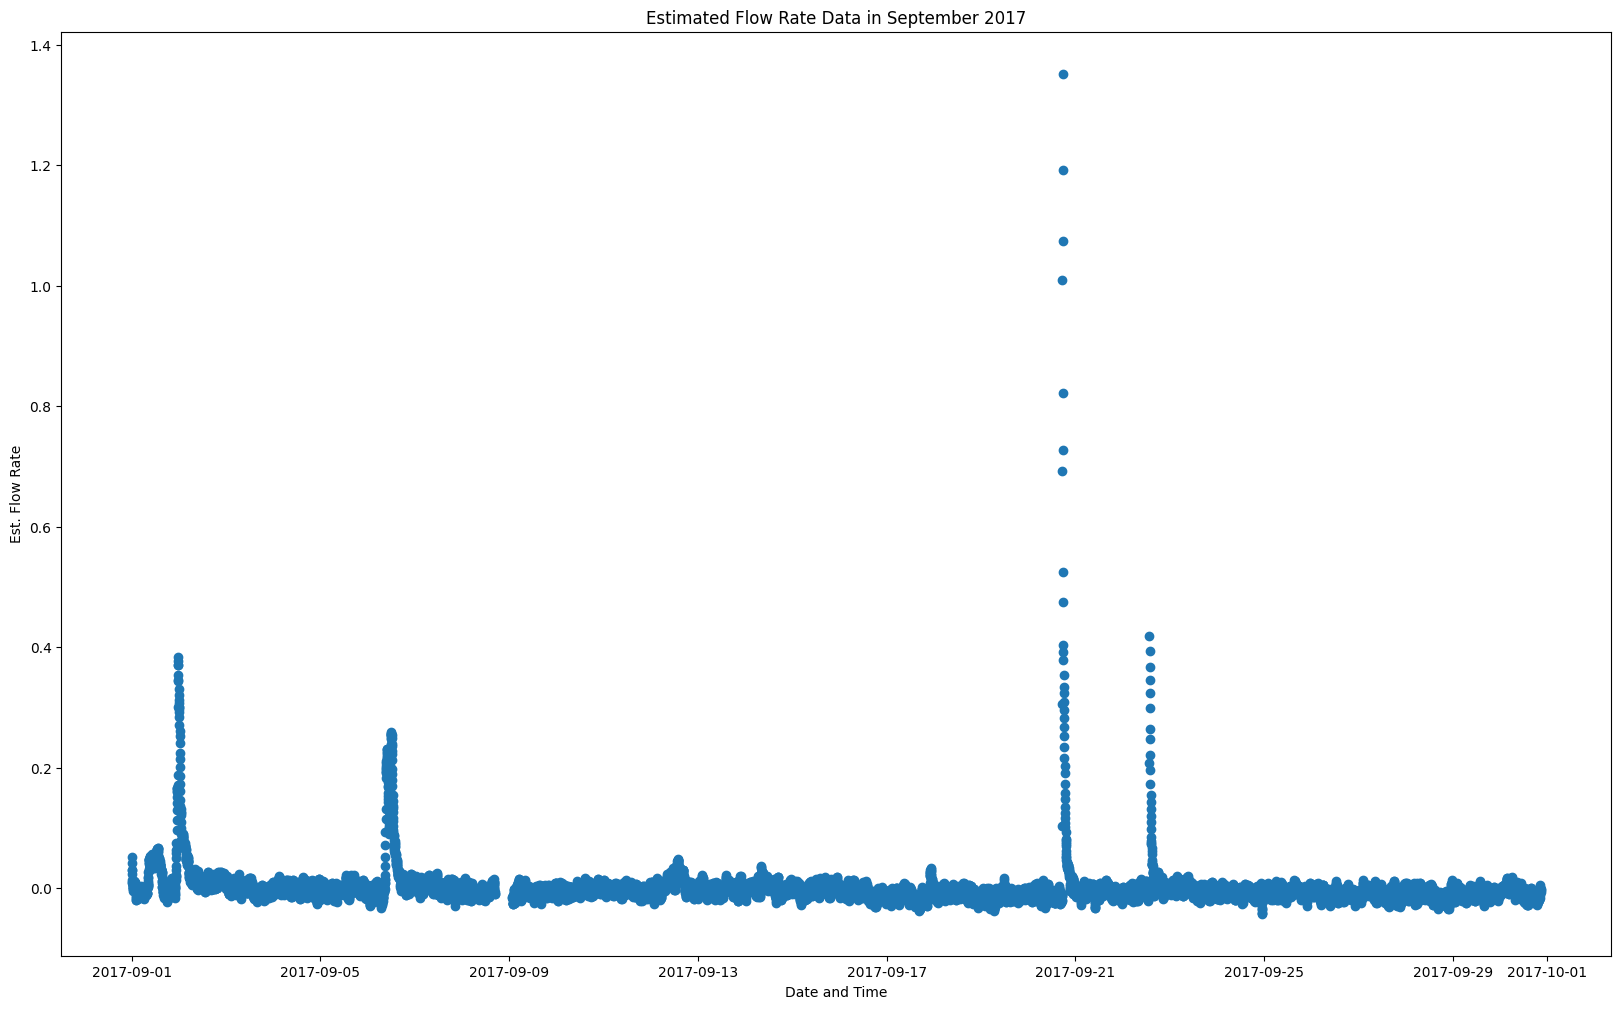

In [ ]:
import pandas as pd
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
df1=pd.read_csv(data_url3)

df1['Date and Time'] = pd.to_datetime(df1['Date and Time'], format='%m/%d/%y %I:%M %p', errors='coerce')

if df1['Date and Time'].isnull().any():
  print("Warning: Some 'Date and Time' values could not be parsed and were replaced with NaT.")

plt.figure(figsize=(20,12))
plt.scatter(df1['Date and Time'],df1['Est. Flow Rate[m^3/s]'])
plt.title('Estimated Flow Rate Data in September 2017')
plt.xlabel('Date and Time')
plt.ylabel('Est. Flow Rate')
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for September 2017.
<br>
Answer: The data was pretty much consistent for the majority of September up until the 20-22nd mark where there was a jump.

## Scatter Plot 2

In [ ]:

df12=df1[df1['Date and Time'].astype(str).str[:7]=='9/28/16']
df12.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]


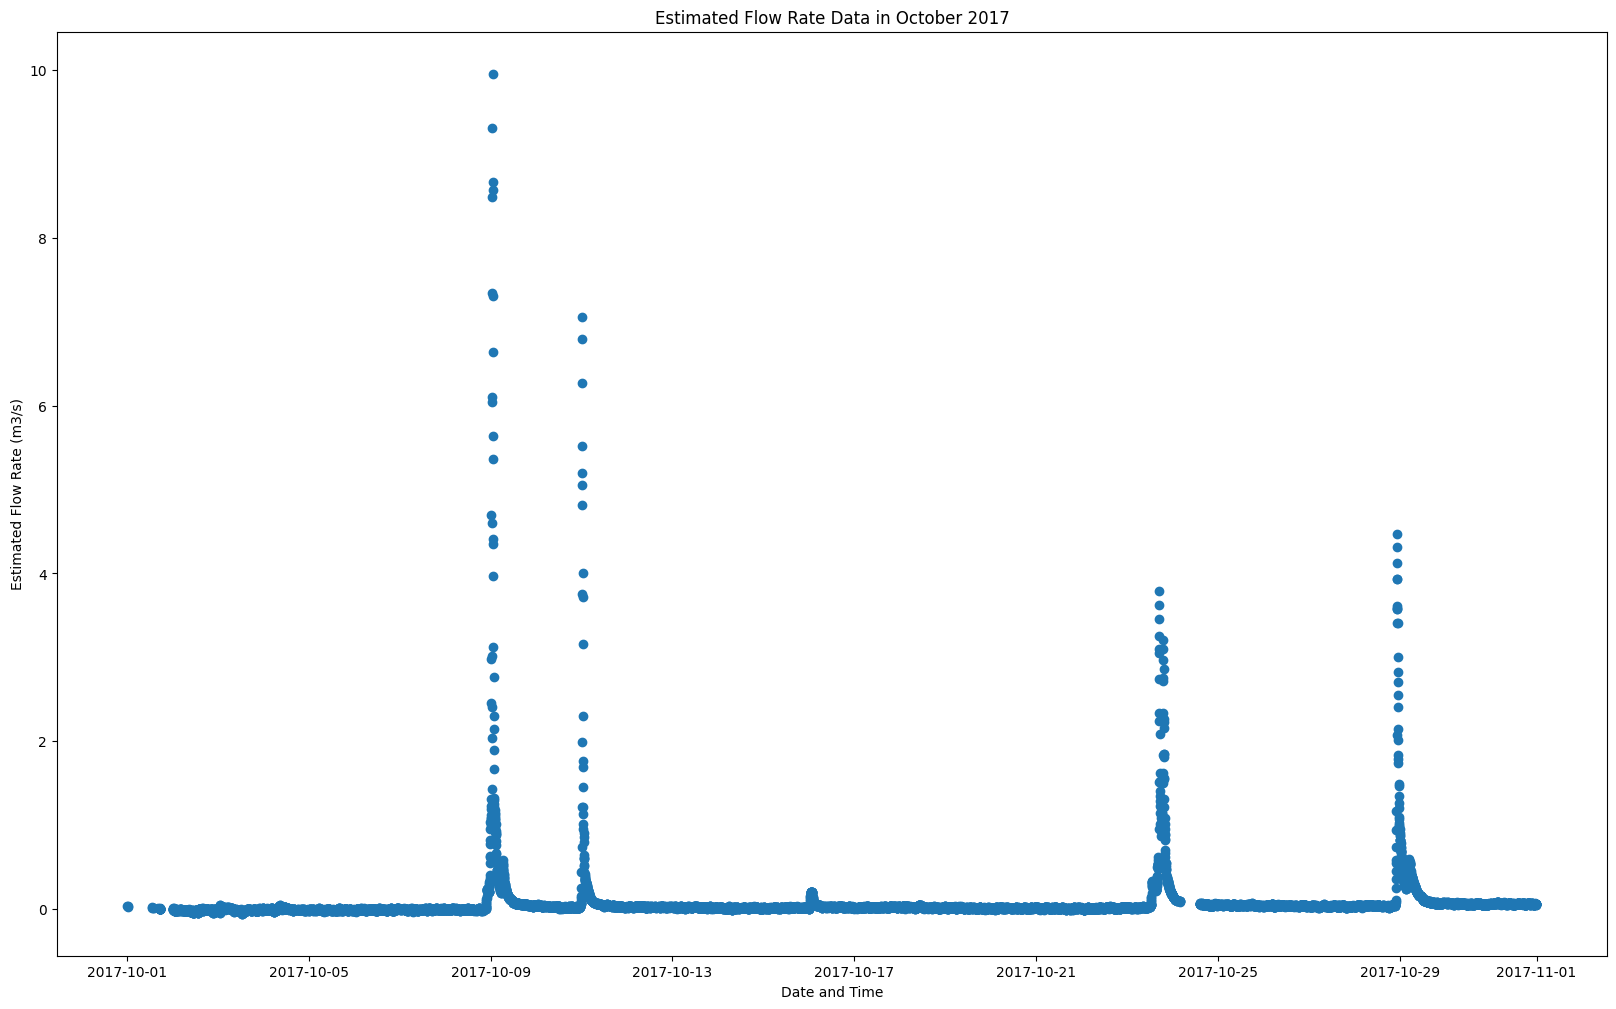

In [ ]:

import pandas as pd
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'
df2=pd.read_csv(data_url4)

df2['Date and Time'] = pd.to_datetime(df2['Date and Time'], format='%m/%d/%Y %H:%M', errors='coerce')

if df2['Date and Time'].isnull().any():
  print("Warning: Some 'Date and Time' values in October data could not be parsed and were replaced with NaT.")

plt.figure(figsize=(20,12))
plt.scatter(df2['Date and Time'],df2['Estimated Flow Rate (m3/s)'])
plt.title('Estimated Flow Rate Data in October 2017')
plt.xlabel('Date and Time')
plt.ylabel('Estimated Flow Rate (m3/s)')
plt.show()


Comment on the trend of Est. Flow Rate[m^3/s] for October 2017.
<br>
**Answer:** The flow rate was pretty much consistent for the entirety of October, with noticeable high spikes on the 9th, 11th, and 24th.
<BR>


## Histogram Plotting
Plot a histogram for Est. Flow Rate  data of September 2017. Be sure to include proper titles and axis labels on each of your plots.<br>
Plot a histogram for Est. Flow Rate data of October 2017. Be sure to include proper titles and axis labels on each of your plots.

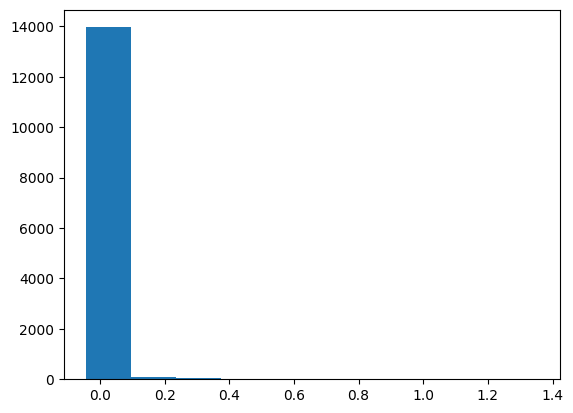

In [ ]:
plt.hist(df1["Est. Flow Rate[m^3/s]"])
plt.show()

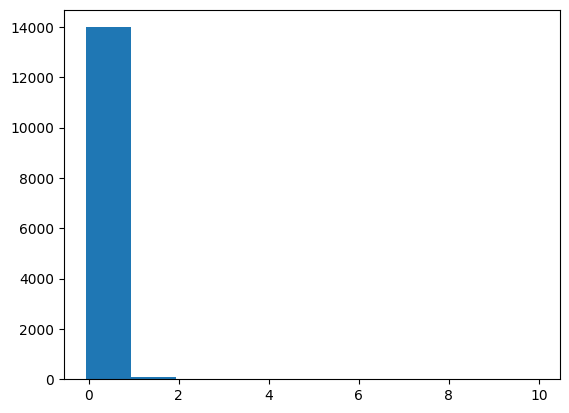

In [ ]:
plt.hist(df2["Estimated Flow Rate (m3/s)"])
plt.show()

***Comment on the shape of both distributions.***
<br>
***Answer:*** The shape of both distributions are similar, and the data also reaches similar points as well.
<br>
<br>

# Boxplot

Generate a boxplot for Est. Flow Rate data of September 2017.<br>
*Generate* a boxplot for Est. Flow Rate data of October 2017.

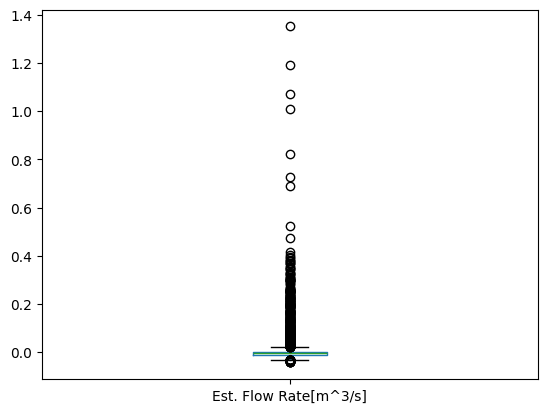

In [ ]:
boxplot1=df1.boxplot(column=['Est. Flow Rate[m^3/s]'], grid=False)

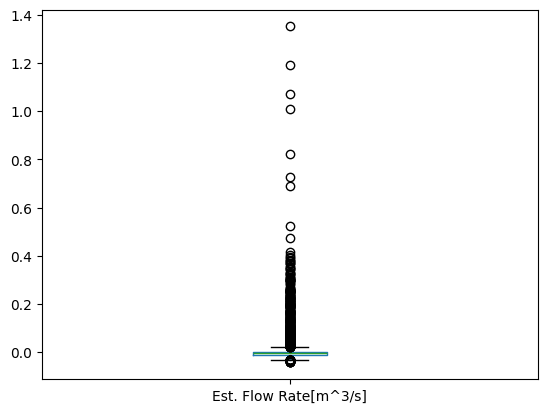

In [ ]:
boxplot1=df1.boxplot(column=['Est. Flow Rate[m^3/s]'], grid=False)

***Comment on both boxplots***
<br>
***Answer:*** <br> The boxplots shapes are extremely similar and the data points are as well.


#Confidence Interval

Generate the 95% confidence interval for the mean estimated flow rate of Septemebr 2017.


In [ ]:
stats.norm.interval(confidence=0.95, loc=np.mean(df1["Est. Flow Rate[m^3/s]"]), scale=stats.sem(df1["Est. Flow Rate[m^3/s]"]))

(np.float64(-0.0005890705452862284), np.float64(0.0006043342287662121))

Interpret the confidence interval you generated.<br>
***Answer:*** We are confident the true value is somewhere between about –0.00059 and 0.00060.
Since this range includes zero, we can’t claim the effect/mean/difference is statistically different from zero. The real value might be slightly negative, slightly positive, or zero.

# Hypothesis testing
Suppose we are interested in testing if the mean estimated flow rate from September 2017 is statisticlly different from the mean estimated flow rate from October 2017.

***Question***<br>
How many samples are there in this experiment? What are they?<br>
***Answer*** There are  two independent samples used to determine whether the mean flow rate in September differs from the mean in October.


# Independent Variable and Dependent Variable

***Question***<br>
What is the independent variable and what is the dependent variable of this experiment?

***Answer***: In this experiment, the independent variable is the month, because we are comparing two different time periods—September 2017 and October 2017—to see whether the time period itself influences the outcome. The dependent variable is the estimated flow rate (m³/s), since this is the measurement being recorded for each timestamp and the value that may change depending on which month the data come from.

***Question***<br>
What are the assumptions for the two sample t test?

***Answer***: A two-sample t-test relies on several key assumptions. First, the two samples must be independent of each other, meaning the observations in September are not paired or linked to the observations in October. Second, the data in each group should be approximately normally distributed, especially when sample sizes are small. Third, the test assumes equal variances between the two groups when using the standard (pooled) two-sample t-test; if this assumption is violated, the Welch t-test should be used instead. Finally, both samples should consist of quantitative, continuous measurements, which is satisfied in this experiment because we are analyzing flow-rate values.



```
# This is formatted as code
```

#Hypothesis testing
Use the appropraite statistical analysis technique.<br>
Conduct model adequacy and comment on the model adequacy.<br>
Conduct hypothesis testing

In [ ]:
t_statistic, p_value = stats.ttest_ind(df1['Est. Flow Rate[m^3/s]'], df2['Estimated Flow Rate (m3/s)'])
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

T-statistic: -22.188, P-value: 0.000


In [ ]:
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -22.188
P-value: 0.000


Based on the tests, what can you conclude about the model assumptions?
<br>
**Answer:** Given the extremely small p-value (p = 0.000), the t-test shows strong evidence that the mean flow rate in September is statistically different from the mean flow rate in October. Since both datasets are large time-series samples and the t-test still produced a stable result, the normality assumption is reasonably satisfied through the Central Limit Theorem. Additionally, the test ran without warnings, suggesting that variance assumptions were not severely violated; even if variances differ slightly, the test is robust with large samples. Overall, the model assumptions appear to be adequately met, and the hypothesis test results can be interpreted with confidence.

# 6-Step Hypothesis Testing

1. State the claim.

2. State the null and alternative hypotheses.

3. Choose the significance level.

4. Compute the test statistic.

5. Make the decision (Reject or Fail to Reject).

6. State the final conclusion in context.

In the spalce below, type your experience with your colab project experience. What you like, what you dislike and what you would like to experience in the future colab projects.


As a group, we had a positive experience working on this Colab project. We liked how the notebook format allowed us to run code, check results in real time, and easily share our progress with each other. It made collaboration smoother and helped keep everyone on the same page. One challenge we faced was troubleshooting errors when different team members ran the notebook in slightly different environments, which sometimes slowed us down. In the future, we would like to work on projects that include more interactive visualizations or real-world datasets, since those make the analysis feel more engaging. Overall, the project helped us strengthen our teamwork and build confidence using Python and statistical tools together.